# Customer Segmentation Using Clustering (Python)

# IMPORT LIBARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# LOAD DATASET

In [5]:
data = pd.read_csv(r"C:\Users\vinee\Downloads\Zaalima Python Project\tele.csv")
data

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalSpent,DevicesConnected,SupportCalls,Churn
0,1,56,Male,One Year,96.028982,1249.110874,4,5,0
1,2,69,Female,Two Year,33.710971,1570.074519,1,7,0
2,3,46,Male,Two Year,73.531013,1790.270343,4,9,1
3,4,32,Female,One Year,41.520187,492.452904,2,0,1
4,5,60,Male,Two Year,21.212077,594.571244,2,3,0
...,...,...,...,...,...,...,...,...,...
995,996,37,Male,Month-to-Month,34.080295,1054.704236,1,9,1
996,997,41,Male,One Year,82.241364,1664.320414,3,1,0
997,998,22,Male,One Year,98.132186,1156.592237,5,3,1
998,999,51,Male,Two Year,77.829840,696.748306,5,5,1


In [6]:
data.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalSpent,DevicesConnected,SupportCalls,Churn
0,1,56,Male,One Year,96.028982,1249.110874,4,5,0
1,2,69,Female,Two Year,33.710971,1570.074519,1,7,0
2,3,46,Male,Two Year,73.531013,1790.270343,4,9,1
3,4,32,Female,One Year,41.520187,492.452904,2,0,1
4,5,60,Male,Two Year,21.212077,594.571244,2,3,0


# DROP UNWANTED COLUMNS

In [8]:
data.isnull().sum()

CustomerID          0
Age                 0
Gender              0
ContractType        0
MonthlyCharges      0
TotalSpent          0
DevicesConnected    0
SupportCalls        0
Churn               0
dtype: int64

In [9]:
data = data.drop(["CustomerID", "Churn"], axis=1)
data

,Age,Gender,ContractType,MonthlyCharges,TotalSpent,DevicesConnected,SupportCalls
0,56,Male,One Year,96.028982,1249.110874,4,5
1,69,Female,Two Year,33.710971,1570.074519,1,7
2,46,Male,Two Year,73.531013,1790.270343,4,9
3,32,Female,One Year,41.520187,492.452904,2,0
4,60,Male,Two Year,21.212077,594.571244,2,3
...,...,...,...,...,...,...,...
995,37,Male,Month-to-Month,34.080295,1054.704236,1,9
996,41,Male,One Year,82.241364,1664.320414,3,1
997,22,Male,One Year,98.132186,1156.592237,5,3
998,51,Male,Two Year,77.829840,696.748306,5,5


# HANDLING MISSING VALUES

In [11]:
data.isnull().sum()

Age                 0
Gender              0
ContractType        0
MonthlyCharges      0
TotalSpent          0
DevicesConnected    0
SupportCalls        0
dtype: int64

In [12]:
data = data.replace(" ", np.nan)
data = data.dropna()



In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Gender            1000 non-null   object 
 2   ContractType      1000 non-null   object 
 3   MonthlyCharges    1000 non-null   float64
 4   TotalSpent        1000 non-null   float64
 5   DevicesConnected  1000 non-null   int64  
 6   SupportCalls      1000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


# Exploratory Data Analysis (EDA)

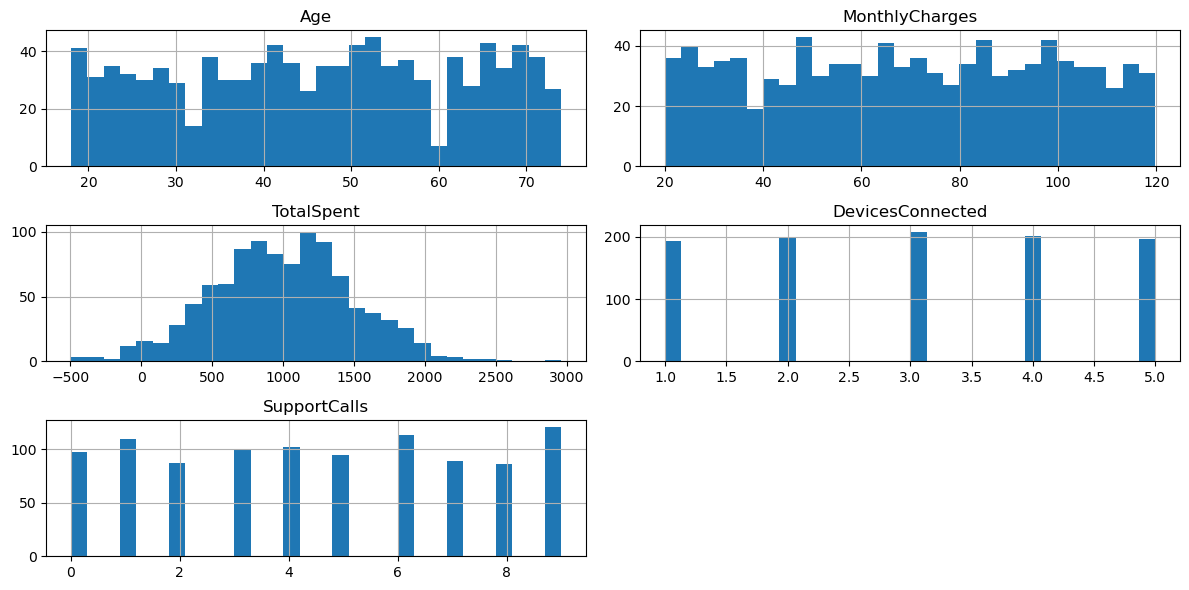

In [15]:
num_cols = ['Age','MonthlyCharges','TotalSpent','DevicesConnected','SupportCalls']
num_cols = [c for c in num_cols if c in data.columns]
data[num_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout(); plt.show()

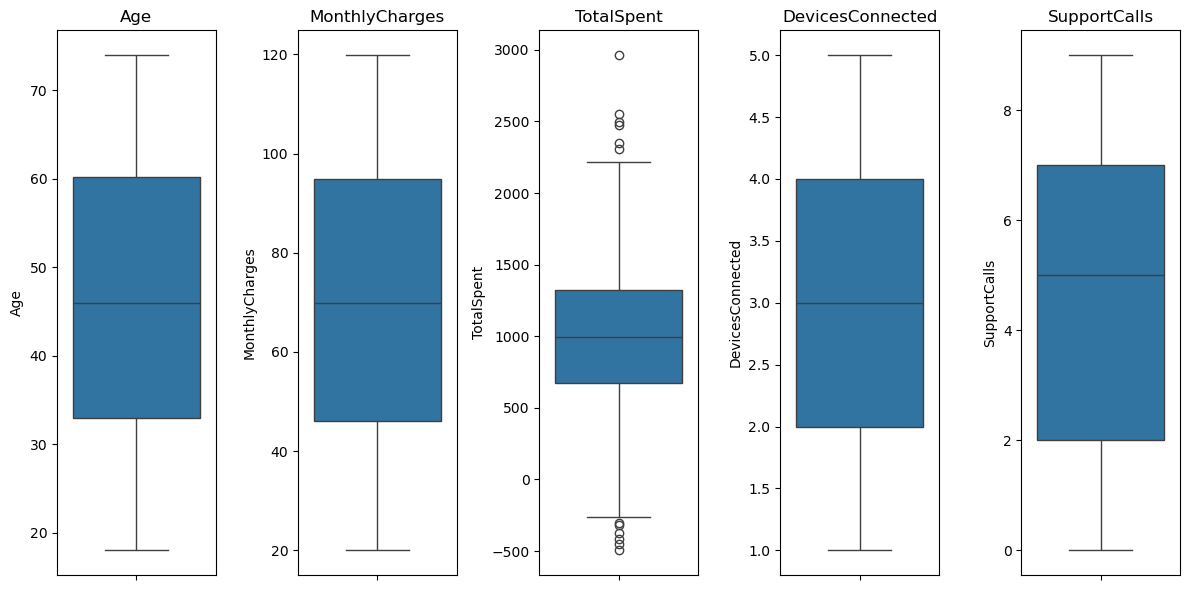

In [16]:
plt.figure(figsize=(12,6))
for i,c in enumerate(num_cols):
    plt.subplot(1,len(num_cols), i+1)
    sns.boxplot(y=data[c])
    plt.title(c)
plt.tight_layout(); plt.show()


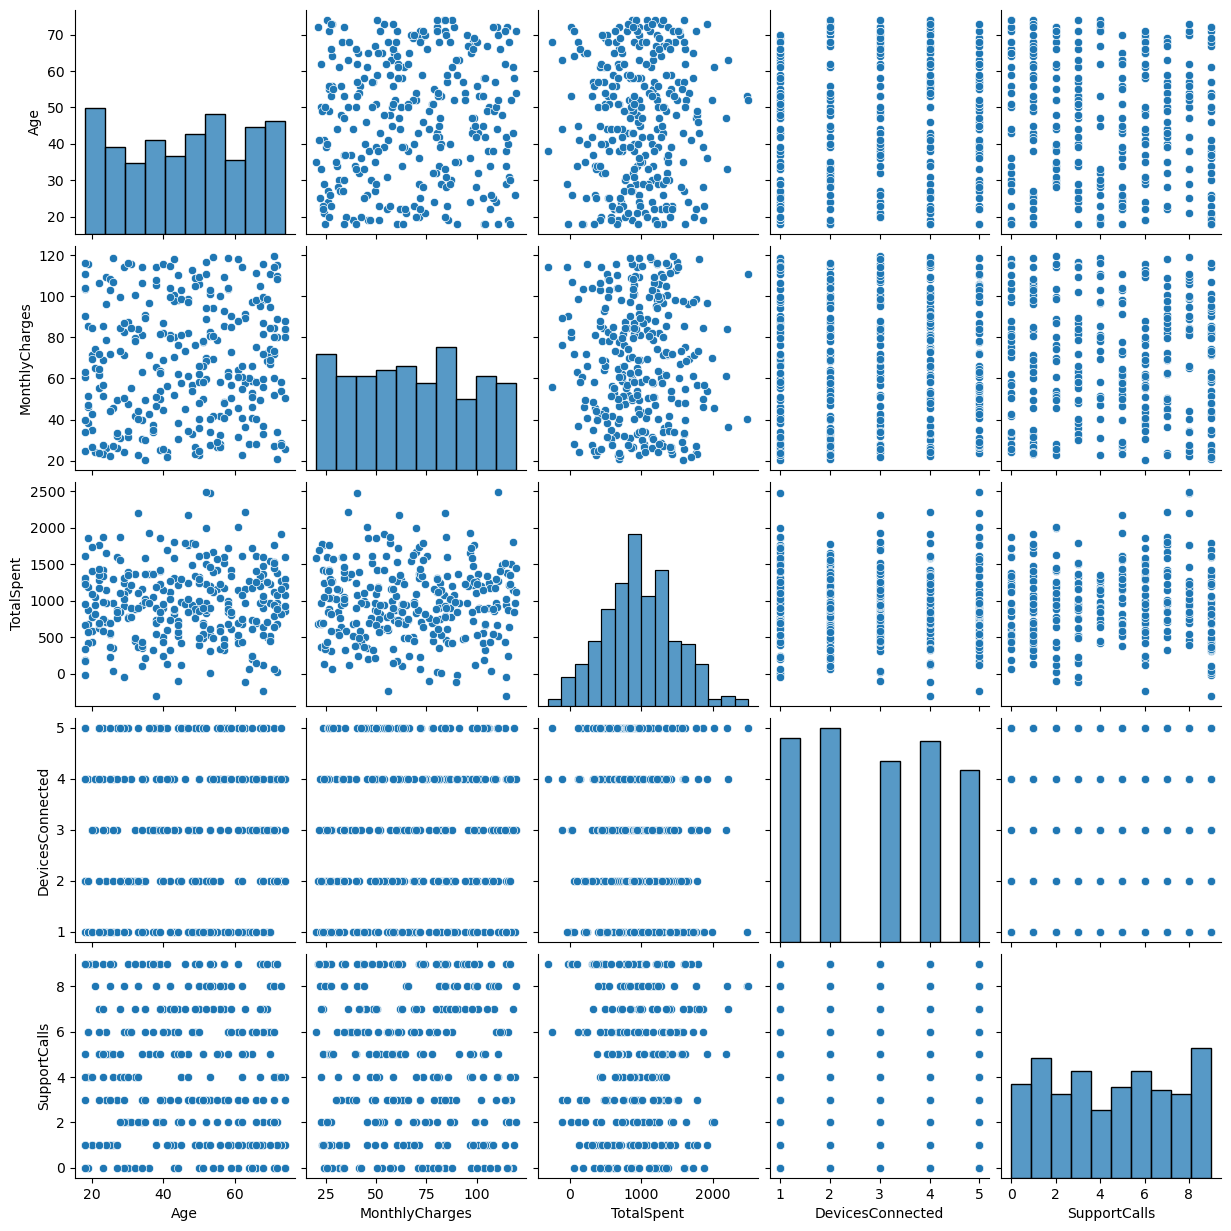

In [17]:
if len(num_cols) >= 2:
    sns.pairplot(data[num_cols].sample(frac=0.3, random_state=42))
    plt.show()

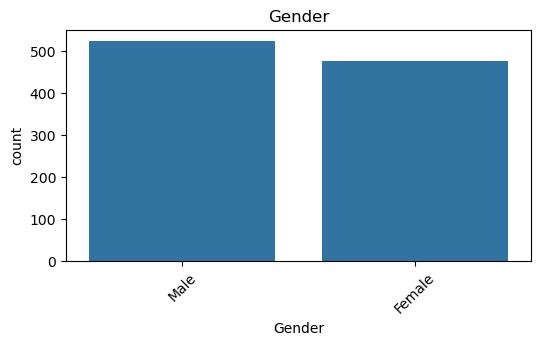

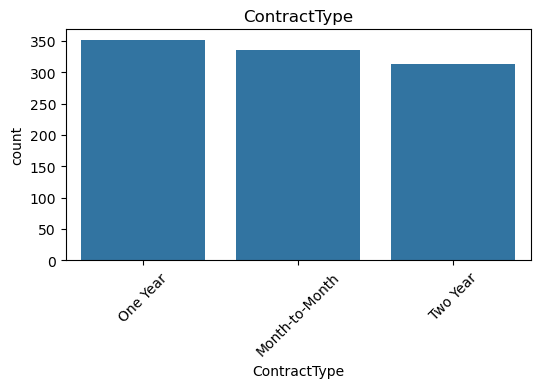

In [18]:
cat_cols = [c for c in ['Gender','ContractType'] if c in data.columns]
for c in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=data, x=c, order=data[c].value_counts().index)
    plt.title(c); plt.xticks(rotation=45)
    plt.show()

# ENCODE CATEGORICAL COLUMNS

In [20]:
cat_cols = ["Gender", "ContractType"]

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])



In [21]:
data

,Age,Gender,ContractType,MonthlyCharges,TotalSpent,DevicesConnected,SupportCalls
0,56,1,1,96.028982,1249.110874,4,5
1,69,0,2,33.710971,1570.074519,1,7
2,46,1,2,73.531013,1790.270343,4,9
3,32,0,1,41.520187,492.452904,2,0
4,60,1,2,21.212077,594.571244,2,3
...,...,...,...,...,...,...,...
995,37,1,0,34.080295,1054.704236,1,9
996,41,1,1,82.241364,1664.320414,3,1
997,22,1,1,98.132186,1156.592237,5,3
998,51,1,2,77.829840,696.748306,5,5


# SCALE NUMERICAL COLUMNS

In [23]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)


# Elbow Method (Find Optimal K)

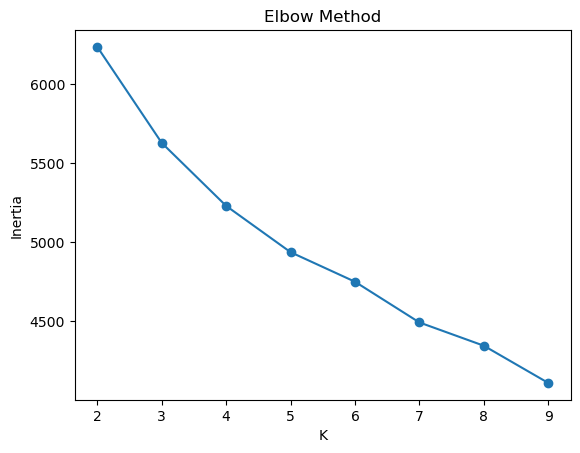

In [25]:
inertia = []

K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia,marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()



# SILHOUETTE SCORE

In [27]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"K={k}, Silhouette Score={score}")


K=2, Silhouette Score=0.10456749448453229
K=3, Silhouette Score=0.12067240132038959
K=4, Silhouette Score=0.12433310002384368
K=5, Silhouette Score=0.11681207868514062
K=6, Silhouette Score=0.12157003731671805
K=7, Silhouette Score=0.12236541950987993
K=8, Silhouette Score=0.11878181389596179
K=9, Silhouette Score=0.12341111932373457


# Apply K-Means


In [55]:
kmeans = KMeans(n_clusters=4, random_state=42)
data["Cluster"] = kmeans.fit_predict(df_scaled)
data.head()


,Age,Gender,ContractType,MonthlyCharges,TotalSpent,DevicesConnected,SupportCalls,Cluster,PCA1,PCA2
0,56,1,1,96.028982,1249.110874,4,5,3,-0.396113,1.234473
1,69,0,2,33.710971,1570.074519,1,7,1,2.699338,-0.086787
2,46,1,2,73.531013,1790.270343,4,9,3,0.497976,1.781113
3,32,0,1,41.520187,492.452904,2,0,1,0.418909,-2.024018
4,60,1,2,21.212077,594.571244,2,3,2,1.205375,0.088867


# PCA for Visualization

In [57]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

data["PCA1"] = pca_data[:, 0]
data["PCA2"] = pca_data[:, 1]


# Scatter Plot of Clusters

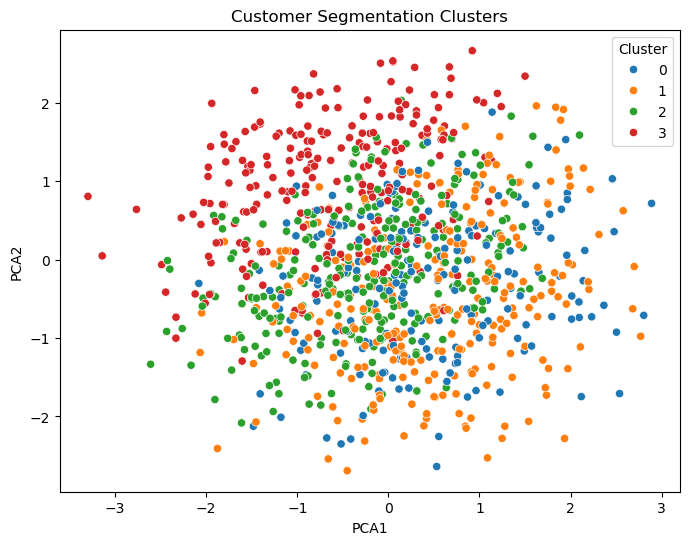

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["PCA1"], y=data["PCA2"], hue=data["Cluster"], palette="tab10")
plt.title("Customer Segmentation Clusters")
plt.show()
